In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("GA_geneticpython/MIO/abz5_100gen_MIO(Replacement)_1302.csv")
data

,makespan,score
0,1925,480.0
1,2031,620.0
2,1807,820.0
3,2373,660.0
4,2147,1000.0
...,...,...
4095,1302,140.0
4096,1360,240.0
4097,1474,200.0
4098,1568,440.0


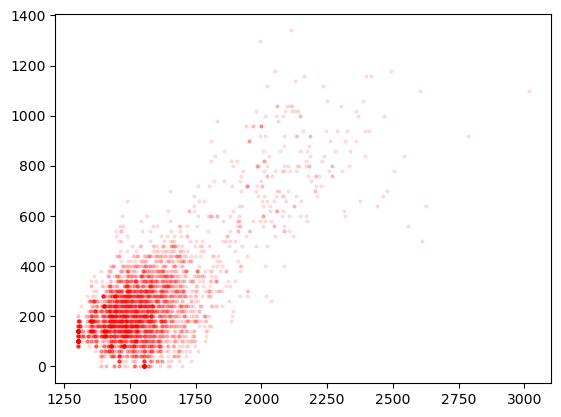

In [8]:
import os
plt.figure()
plt.scatter(data['makespan'], data['score'], color='red', alpha=0.1, s=4, label='Optimal')
plt.show()

def read_csv_with_condition(folder_path, keyword):
    # 폴더 내 모든 파일을 검색
    for filename in os.listdir(folder_path):
        # keyword를 파일명에 포함하고 있는지 확인
        if keyword in filename:
            # 파일명에 해당하는 csv 파일을 읽어옴
            filepath = os.path.join(folder_path, filename)
            return pd.read_csv(filepath)
    
    # 조건에 맞는 파일이 없는 경우 None 반환
    return None

def plot(ax1, ax2, ax3, ax4, dataset):
    d4 = pd.read_csv("GA_geneticpython/MIO/"+dataset+"_100gen_MIO(Replacement)_1302.csv")
    ax4.scatter(data['makespan'], data['score'], color='red', alpha=0.1, s=4, label='Individual')

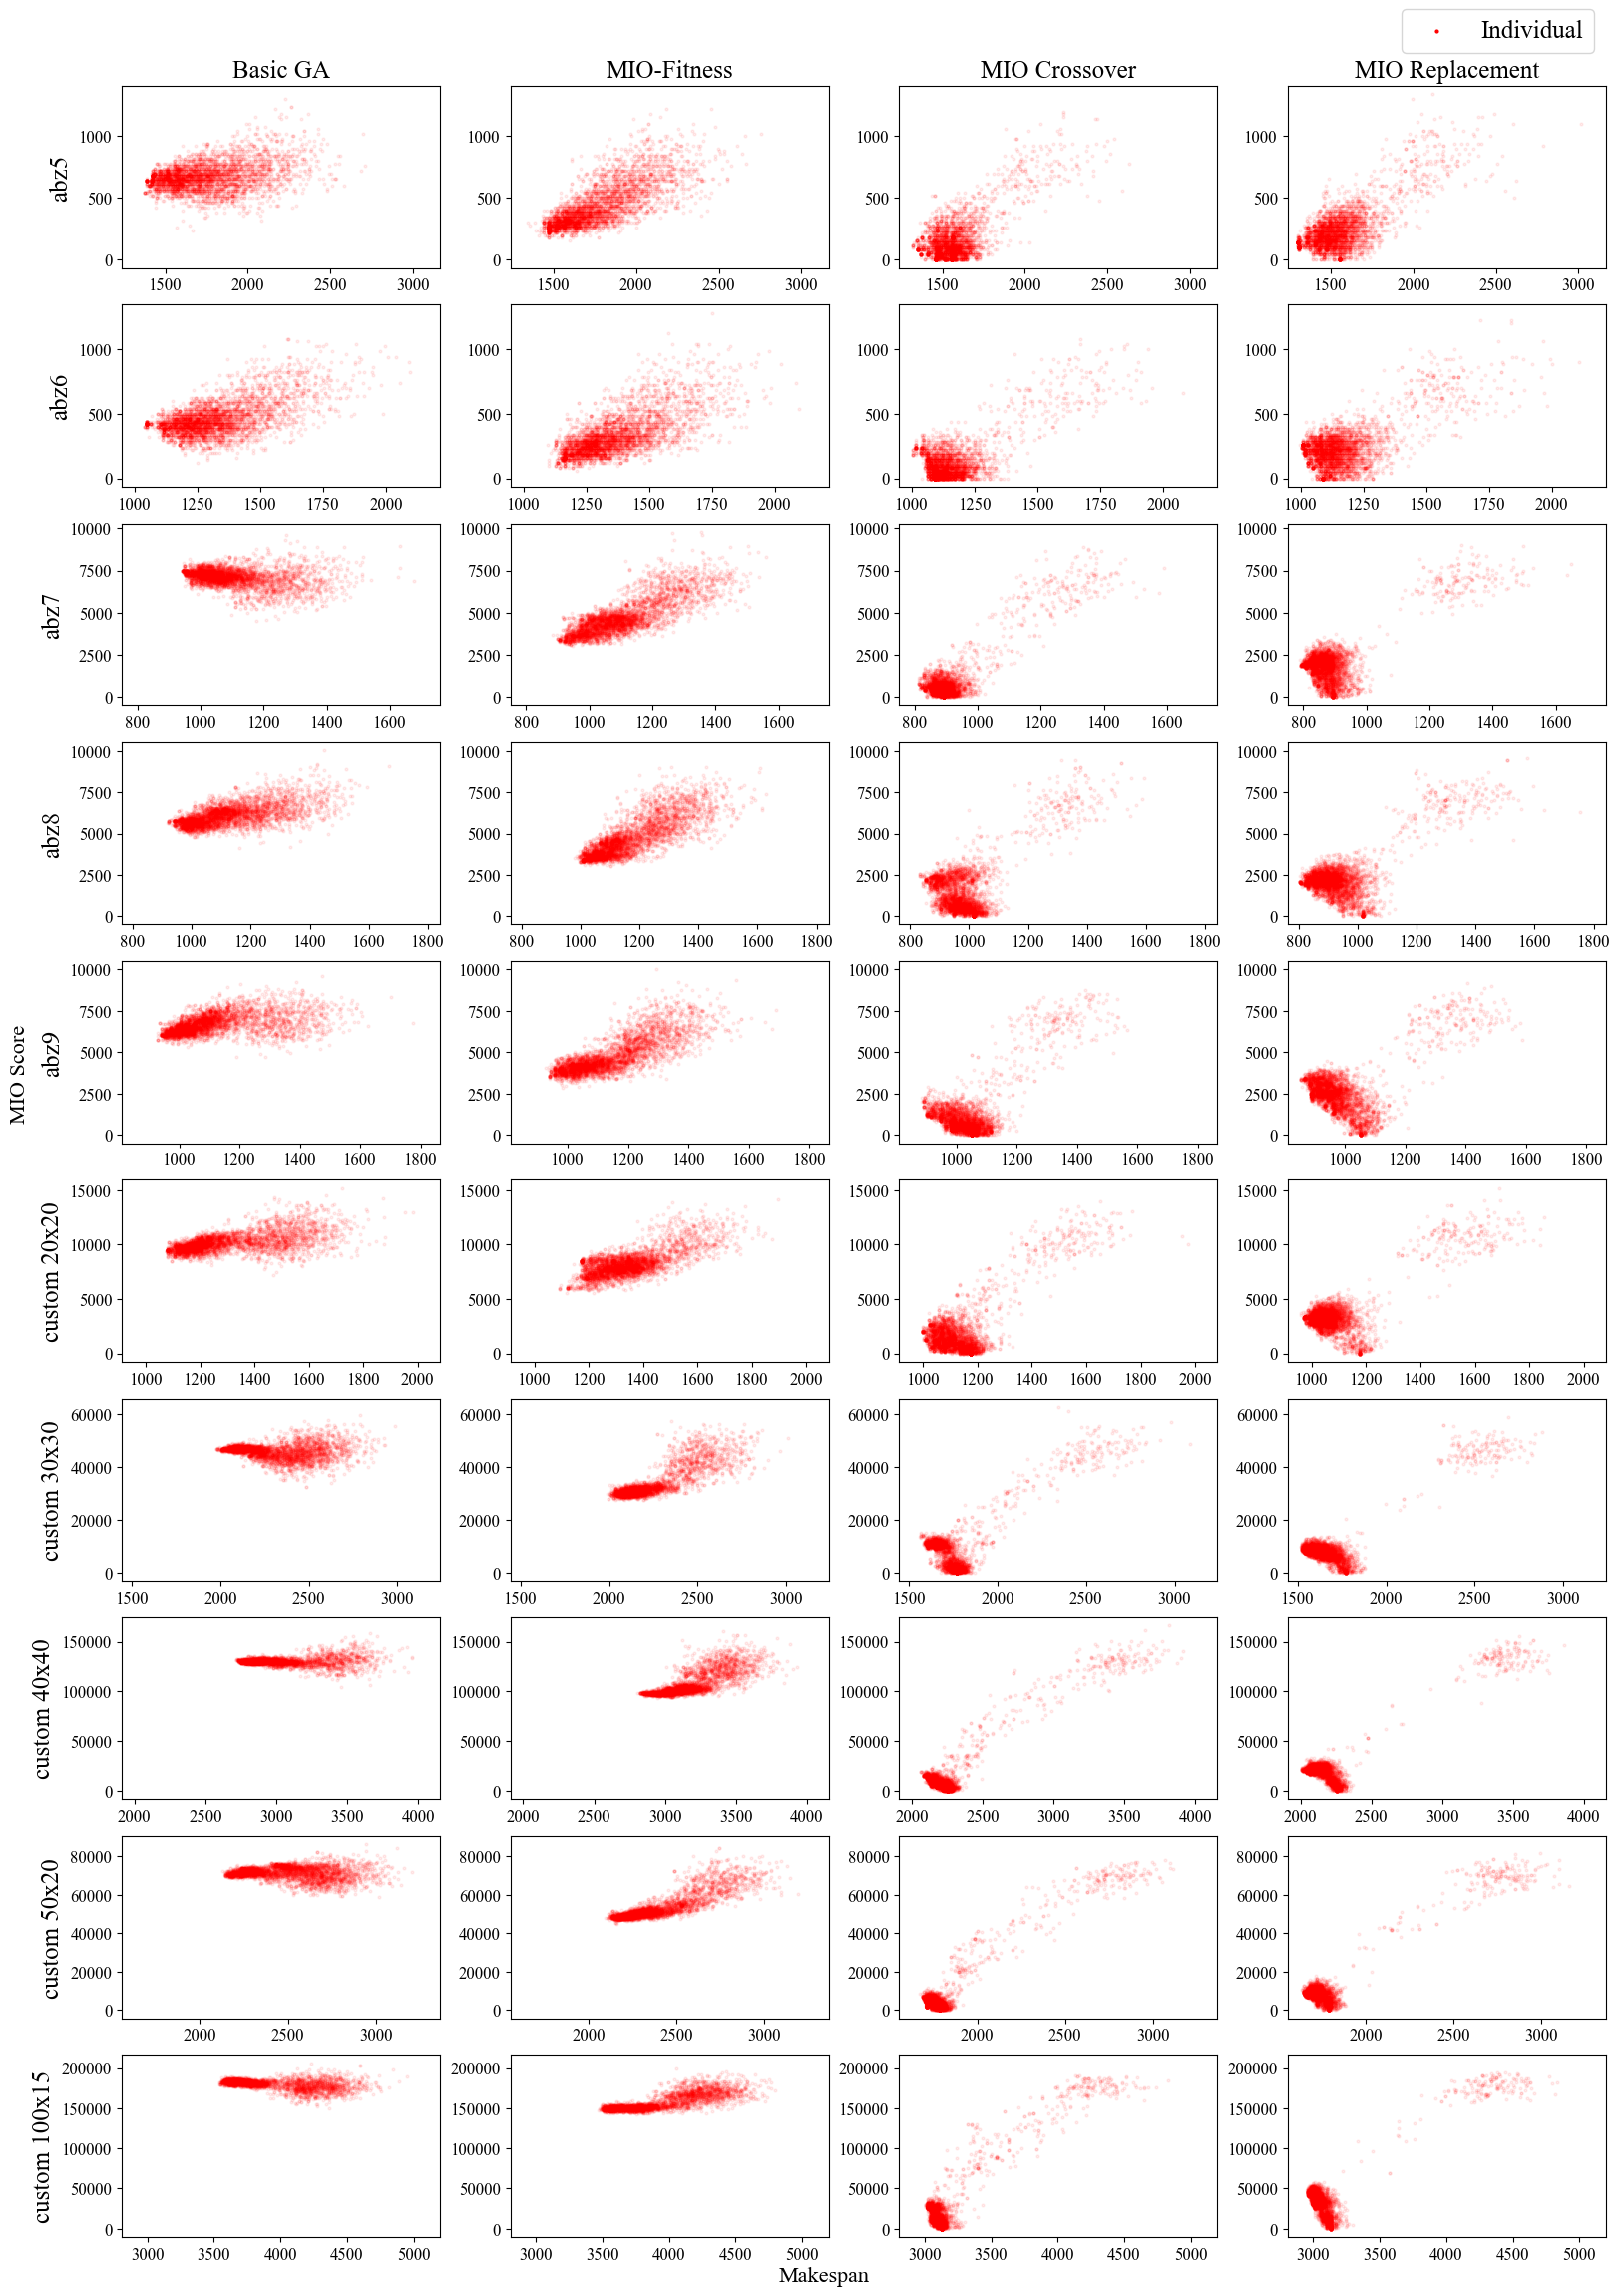

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def read_csv_with_condition(folder_path, keyword1, keyword2):
    # 폴더 내 모든 파일을 검색
    for filename in os.listdir(folder_path):
        # keyword를 파일명에 포함하고 있는지 확인
        if keyword1 in filename:
            if keyword2 in filename:
                if '.csv' in filename:
                    # 파일명에 해당하는 csv 파일을 읽어옴
                    filepath = os.path.join('GA_geneticpython/MIO', filename)
                    return pd.read_csv(filepath)
    
    # 조건에 맞는 파일이 없는 경우 None 반환
    return None

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams.update({'font.size': 14})
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig = plt.figure(figsize=(16, 22))
axes = [fig.add_subplot(10, 4, i + 1) for i in range(40)]
# plt.suptitle("Comparison between plain GA and MIO-based GA")

axes[0].set_title("Basic GA")
axes[1].set_title("MIO-Fitness")
axes[2].set_title("MIO Crossover")
axes[3].set_title("MIO Replacement")
axes[0].set_ylabel("abz5")
axes[4].set_ylabel("abz6")
axes[8].set_ylabel("abz7")
axes[12].set_ylabel("abz8")
axes[16].set_ylabel("abz9")
axes[20].set_ylabel("custom 20x20")
axes[24].set_ylabel("custom 30x30")
axes[28].set_ylabel("custom 40x40")
axes[32].set_ylabel("custom 50x20")
axes[36].set_ylabel("custom 100x15")


def plot_row(ax, dataset):
    file1 = read_csv_with_condition("GA_geneticpython/MIO", dataset, 'Plain')
    file2 = read_csv_with_condition("GA_geneticpython/MIO", dataset, 'adaptive')
    file3 = read_csv_with_condition("GA_geneticpython/MIO", dataset, 'Crossover')
    file4 = read_csv_with_condition("GA_geneticpython/MIO", dataset, 'Replacement')
    ax[0].scatter(file1['makespan'], file1['score'], color='red', alpha=0.07, s=4, label='Individual')
    ax[1].scatter(file2['makespan'], file2['score'], color='red', alpha=0.07, s=4, label='Individual')
    ax[2].scatter(file3['makespan'], file3['score'], color='red', alpha=0.07, s=4, label='Individual')
    ax[3].scatter(file4['makespan'], file4['score'], color='red', alpha=0.07, s=4, label='Individual')
    x_left = min(file4['makespan'])
    y_left = min(file4['score'])
    x_right = max(file4['makespan'])
    y_right = max(file4['score'])
    for f in [file1, file2, file3, file4]:
        if min(f['makespan']) < x_left:
            x_left = min(f['makespan'])
        if max(f['makespan']) > x_right:
            x_right = max(f['makespan'])
        if min(f['score']) < y_left:
            y_left = min(f['score'])
        if max(f['score']) > y_right:
            y_right = max(f['score'])
    for i in range(4):
        ax[i].set_xlim(x_left * 0.95, x_right * 1.05)
        ax[i].set_ylim(y_left - y_right * 0.05, y_right * 1.05)
        

plot_row(axes[0:4], 'abz5')
plot_row(axes[4:8], 'abz6')
plot_row(axes[8:12], 'abz7')
plot_row(axes[12:16], 'abz8')
plot_row(axes[16:20], 'abz9')
plot_row(axes[20:24], '2020')
plot_row(axes[24:28], '3030')
plot_row(axes[28:32], '4040')
plot_row(axes[32:36], '5020')
plot_row(axes[36:40], '10015')
leg = axes[3].legend(loc='center right', bbox_to_anchor=(1, 1.3))
for lh in leg.legendHandles:
    lh.set_alpha(1)
fig.text(0.51, 0., 'Makespan', ha='center', fontsize = 16)
fig.text(0.0, 0.55, 'MIO Score', va='center', rotation='vertical', fontsize = 16)
plt.subplots_adjust(wspace=0.22, left = 0.07, right = 1., top = 1., bottom=0.02)
# plt.tight_layout()
plt.show()

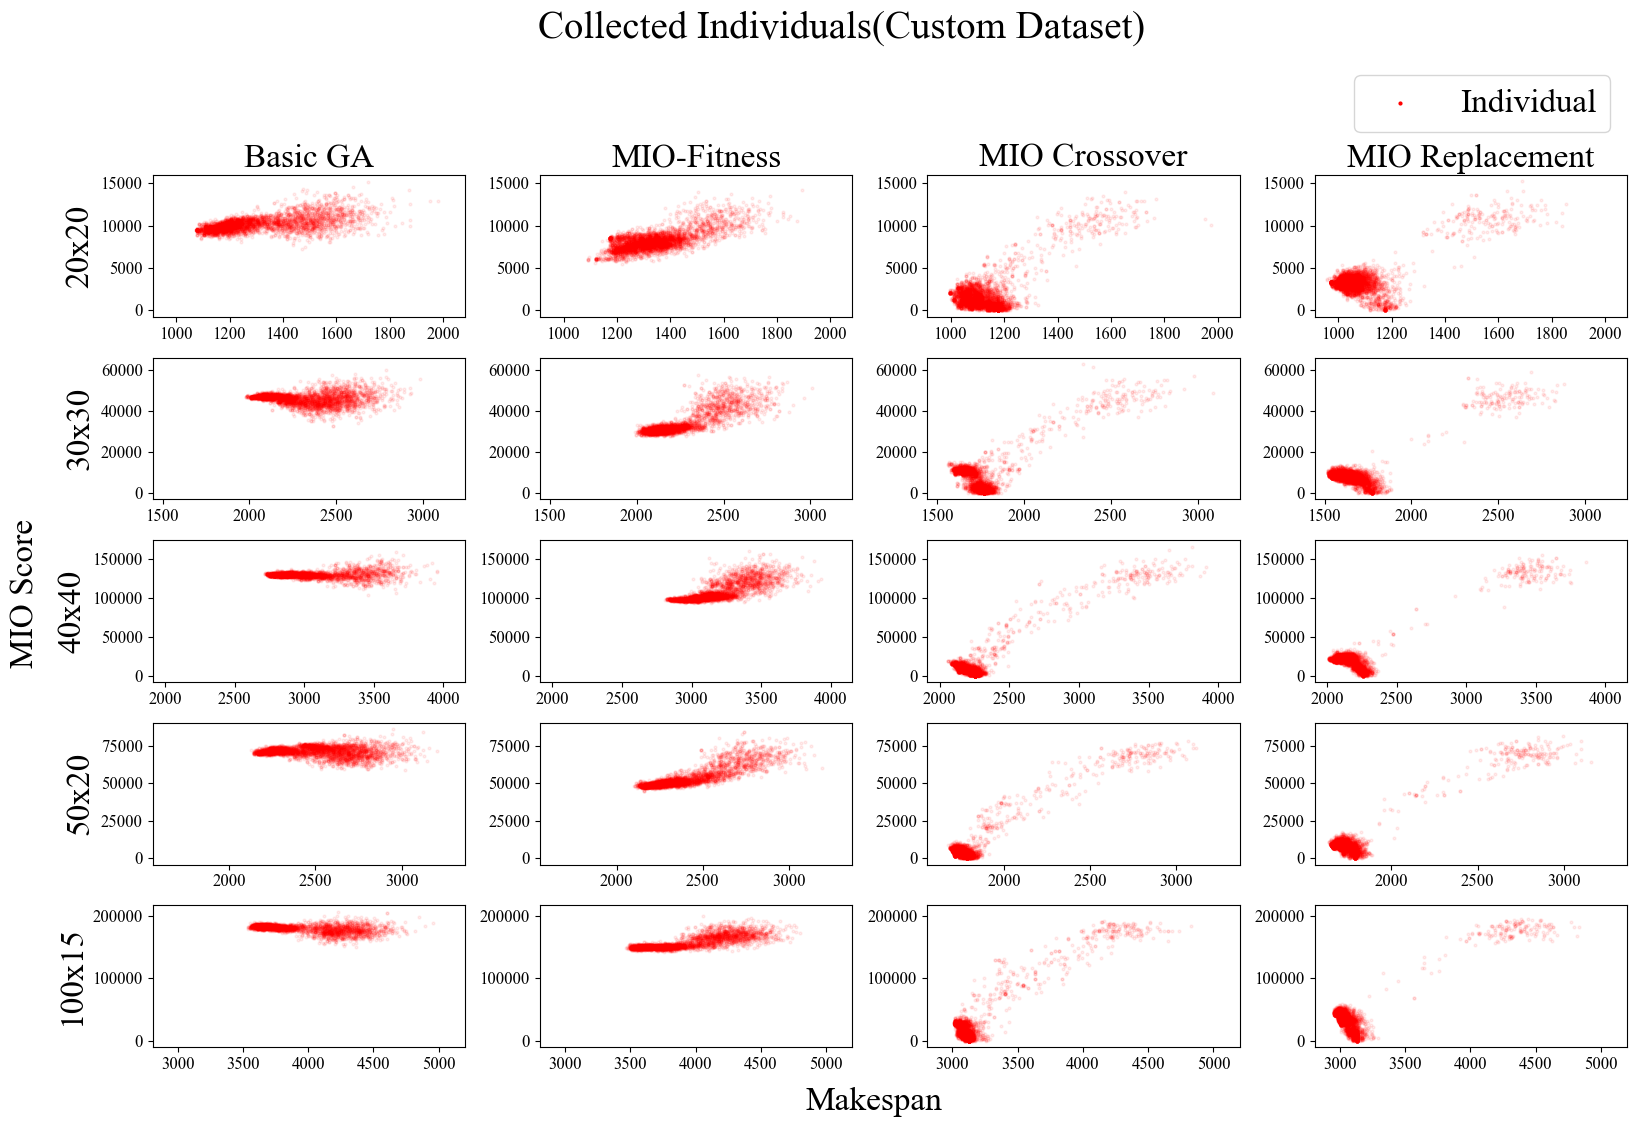

In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def read_csv_with_condition(folder_path, keyword1, keyword2):
    # 폴더 내 모든 파일을 검색
    for filename in os.listdir(folder_path):
        # keyword를 파일명에 포함하고 있는지 확인
        if keyword1 in filename:
            if keyword2 in filename:
                if '.csv' in filename:
                    # 파일명에 해당하는 csv 파일을 읽어옴
                    filepath = os.path.join('GA_geneticpython/result/MIO', filename)
                    return pd.read_csv(filepath)
    
    # 조건에 맞는 파일이 없는 경우 None 반환
    return None

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 24

plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams.update({'font.size': 14})
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig = plt.figure(figsize=(16, 11))
axes = [fig.add_subplot(5, 4, i + 1) for i in range(20)]
# plt.suptitle("Comparison between plain GA and MIO-based GA")

axes[0].set_title("Basic GA")
axes[1].set_title("MIO-Fitness")
axes[2].set_title("MIO Crossover")
axes[3].set_title("MIO Replacement")
# axes[0].set_ylabel("custom 20x20")
# axes[4].set_ylabel("custom 30x30")
# axes[8].set_ylabel("custom 40x40")
# axes[12].set_ylabel("custom 50x20")
# axes[16].set_ylabel("custom 100x15")
axes[0].set_ylabel("20x20")
axes[4].set_ylabel("30x30")
axes[8].set_ylabel("40x40")
axes[12].set_ylabel("50x20")
axes[16].set_ylabel("100x15")

# axes[0].set_ylabel("abz5")
# axes[4].set_ylabel("abz6")
# axes[8].set_ylabel("abz7")
# axes[12].set_ylabel("abz8")
# axes[16].set_ylabel("abz9")

def plot_row(ax, dataset):
    file1 = read_csv_with_condition("GA_geneticpython/result/MIO", dataset, 'Plain')
    file2 = read_csv_with_condition("GA_geneticpython/result/MIO", dataset, 'adaptive')
    file3 = read_csv_with_condition("GA_geneticpython/result/MIO", dataset, 'Crossover')
    file4 = read_csv_with_condition("GA_geneticpython/result/MIO", dataset, 'Replacement')
    ax[0].scatter(file1['makespan'], file1['score'], color='red', alpha=0.07, s=4, label='Individual')
    ax[1].scatter(file2['makespan'], file2['score'], color='red', alpha=0.07, s=4, label='Individual')
    ax[2].scatter(file3['makespan'], file3['score'], color='red', alpha=0.07, s=4, label='Individual')
    ax[3].scatter(file4['makespan'], file4['score'], color='red', alpha=0.07, s=4, label='Individual')
    x_left = min(file4['makespan'])
    y_left = min(file4['score'])
    x_right = max(file4['makespan'])
    y_right = max(file4['score'])
    for f in [file1, file2, file3, file4]:
        if min(f['makespan']) < x_left:
            x_left = min(f['makespan'])
        if max(f['makespan']) > x_right:
            x_right = max(f['makespan'])
        if min(f['score']) < y_left:
            y_left = min(f['score'])
        if max(f['score']) > y_right:
            y_right = max(f['score'])
    for i in range(4):
        ax[i].set_xlim(x_left * 0.95, x_right * 1.05)
        ax[i].set_ylim(y_left - y_right * 0.05, y_right * 1.05)
        

plot_row(axes[0:4], '2020')
plot_row(axes[4:8], '3030')
plot_row(axes[8:12], '4040')
plot_row(axes[12:16], '5020')
plot_row(axes[16:20], '10015')
leg = axes[3].legend(loc='center right', bbox_to_anchor=(1, 1.5))
for lh in leg.legendHandles:
    lh.set_alpha(1)
fig.text(0.52, -0.02, 'Makespan', ha='center', fontsize = BIGGER_SIZE)
fig.text(-0.02, 0.45, 'MIO Score', va='center', rotation='vertical', fontsize = BIGGER_SIZE)
plt.subplots_adjust(wspace=0.22, left = 0.07, right = 1., top = 1., bottom=0.02)
plt.suptitle('Collected Individuals(Custom Dataset)', fontsize = 28)
plt.tight_layout()
plt.show()

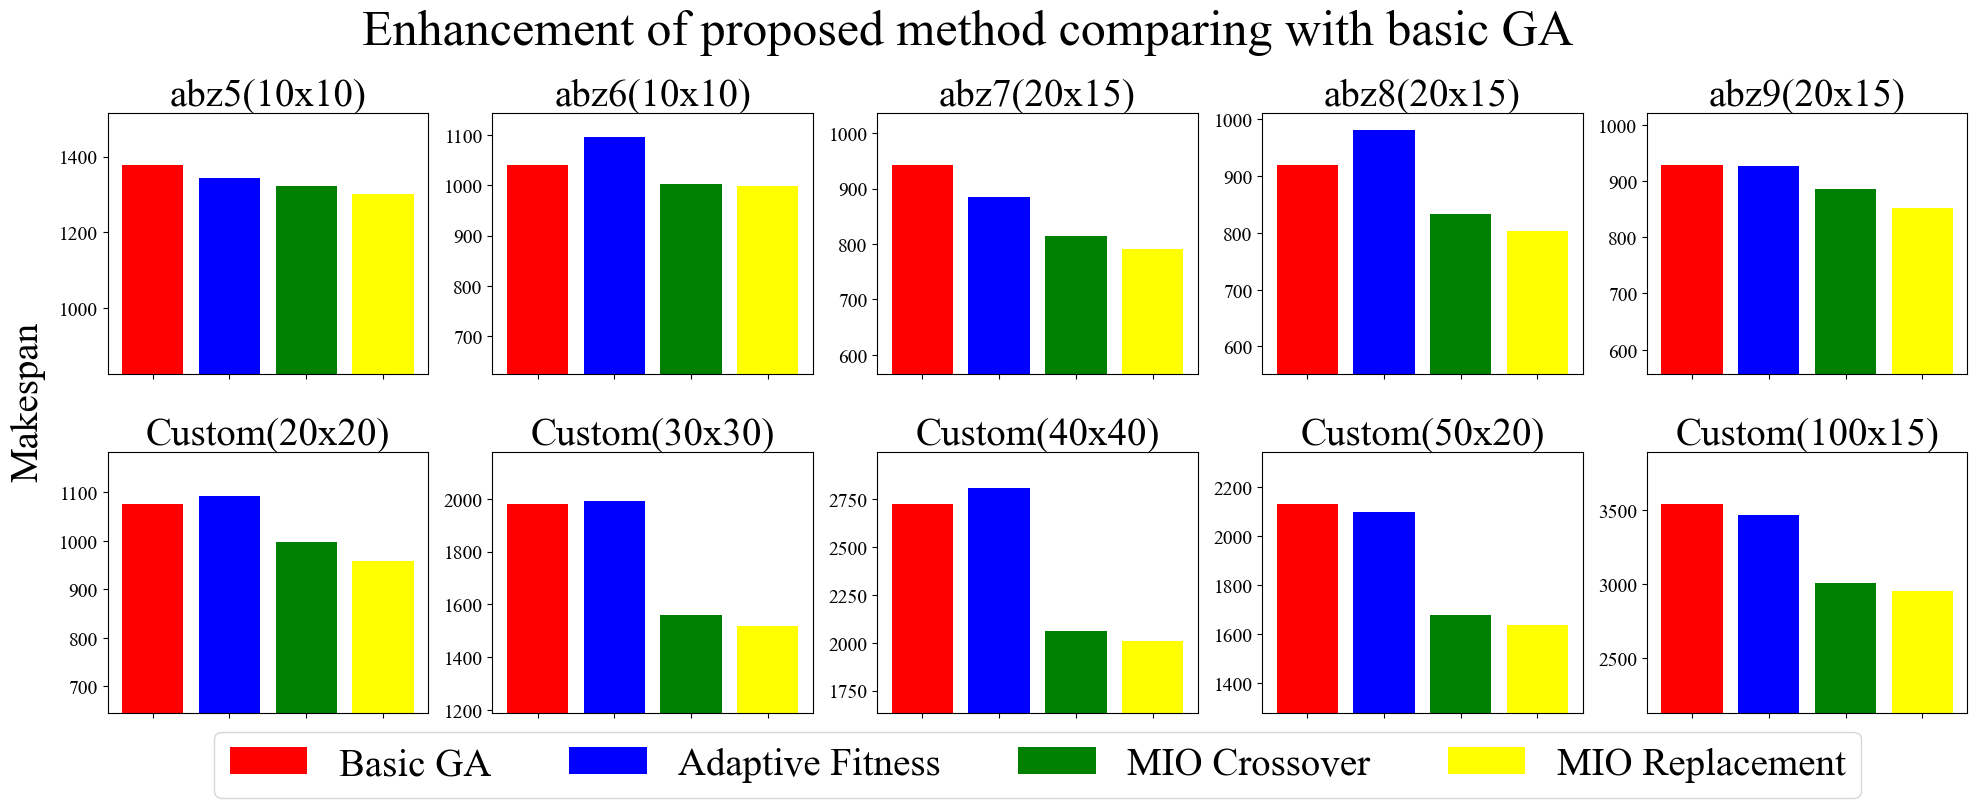

In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Result.csv', encoding='UTF-8')

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 28
plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams.update({'font.size': 14})
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig = plt.figure(figsize=(20, 8))
axes = [fig.add_subplot(2, 5, i + 1) for i in range(10)]
plt.suptitle("Enhancement of proposed method comparing with basic GA", fontsize=36)
for i in range(10):
    for j, color in enumerate(['red', 'blue', 'green', 'yellow']):
        axes[i].bar(data.columns[j+1],data.iloc[i][j+1],color=color, label = data.columns[j+1])
    # axes[i].bar(data.columns[2],data.iloc[i][2],color='red')
    # axes[i].bar(data.columns[3],data.iloc[i][3],color='red')
    # axes[i].bar(data.columns[4],data.iloc[i][4],color='red')
    axes[i].set_title(data.iloc[i,0])
    axes[i].set_ylim([data.iloc[i][1]*0.6, data.iloc[i][1]*1.1])
    axes[i].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
# plt.subplots_adjust(wspace=0.5, left = 0.07, right = 1., top = 1., bottom=0.)
fig.text(0.03, 0.4, 'Makespan', ha='center', rotation='vertical', fontsize = 28)
# leg = axes[7].legend(loc='lower center', bbox_to_anchor=(1, 1.3))
leg = axes[7].legend(loc='lower center',ncol=4,bbox_to_anchor=(0.5, -0.4))
plt.subplots_adjust(hspace = 0.3, left = 0.07, right = 1., top = 0.85, bottom=0.1)
# plt.legend(loc='lower center')
# plt.tight_layout()
plt.show()

In [73]:
data.iloc[0,0]

'abz5(10x10)'

In [75]:
data.iloc[2,0]

'abz7(20x15)'

In [34]:
data.columns[1:]

Index(['Basic GA', 'Adaptive Fitness', 'MIO Crossover', 'MIO Replacement'], dtype='object')

In [5]:
[data.iloc[i][4]/2, data.iloc[i][0]*0.2]

TypeError: can't multiply sequence by non-int of type 'float'

In [7]:
data.iloc[i][4]/2

651.0

In [10]:
data.iloc[i,1]

1377